In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
plt.style.use("seaborn-paper")
mpl.rcParams.update({
    'font.family': 'STIXGeneral',
    # 'font.sans-serif': ['Times New Roman'],
    'mathtext.default':'rm',
    'mathtext.fontset':'stix',
    'mathtext.fallback_to_cm':False,
    "axes.titlesize" : 24,
"axes.labelsize" : 20,
"lines.linewidth" : 3,
"lines.markersize" : 10,
"xtick.labelsize" : 18,
"ytick.labelsize" : 18,
'savefig.dpi':300,
'legend.fontsize':20,
'figure.figsize':(8,6)
    })
plt.rcParams['axes.unicode_minus'] = False

/usr/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/usr/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  self[key] = other[key]
/usr/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]


In [36]:
time = np.loadtxt("../data/time.txt")

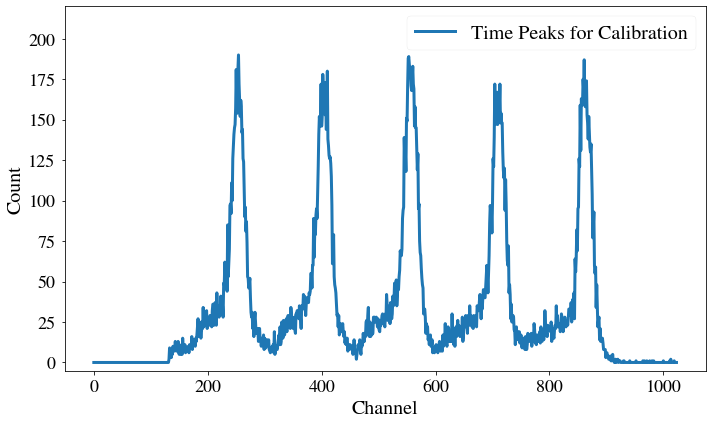

In [16]:
plt.figure(figsize=(10,6))
plt.plot(time,label="Time Peaks for Calibration")
plt.legend()
plt.xlabel("Channel")
plt.ylabel("Count")
plt.ylim((-5,220))
plt.tight_layout()
plt.savefig("../plots/time.pdf")


In [17]:
time_data = pd.read_csv("../data/TimeCalibration.csv")

In [19]:
time_data.to_latex("../Report/TimeCalibration.tex",index=False)

In [30]:
peakpos = np.array([eval(i) for i in time_data.keys()[1:]])

In [37]:
delaytime = np.array([16,20,24,28,32])

In [43]:
delaytime

array([16, 20, 24, 28, 32])

In [42]:
import statsmodels.api as sm

In [44]:
X = sm.add_constant(peakpos)
Y = delaytime

In [46]:
model1 = sm.OLS(Y,X)
res1 = model1.fit()
res1.summary()

/home/sitianq/.local/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.677e+04
Date:                Mon, 10 May 2021   Prob (F-statistic):           1.02e-06
Time:                        15:54:36   Log-Likelihood:                 5.8126
No. Observations:                   5   AIC:                            -7.625
Df Residuals:                       3   BIC:                            -8.406
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2530      0.122     75.854      0.000       8.865       9.641
x1             0.0265      0.000    129.481      0.000       0.026       0.027
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.667
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.397
Skew:                          -0.206   Prob(JB):                        0.820
Kurtosis:                       1.683   Cond. No.                     1.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

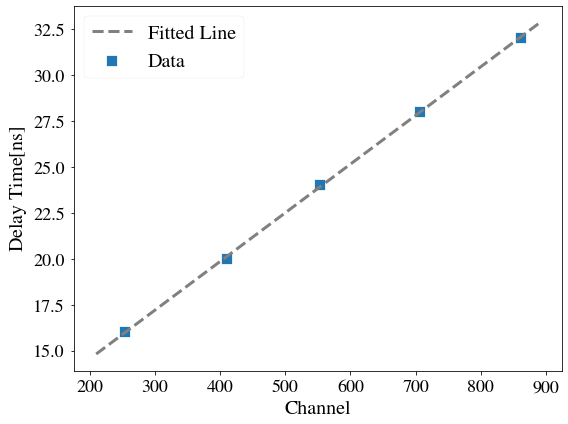

In [52]:
plt.figure()
plt.scatter(peakpos,delaytime,marker='s',label="Data")
aux = np.linspace(210,890)
plt.plot(aux,aux*0.0265+9.2530,"--",color="gray",label="Fitted Line")
plt.legend()
plt.xlabel("Channel")
plt.ylabel("Delay Time$[ns]$")
plt.tight_layout()
plt.savefig("../plots/TimeCalibration.pdf")



In [53]:
es = np.loadtxt("../data/EnergySelection.txt")

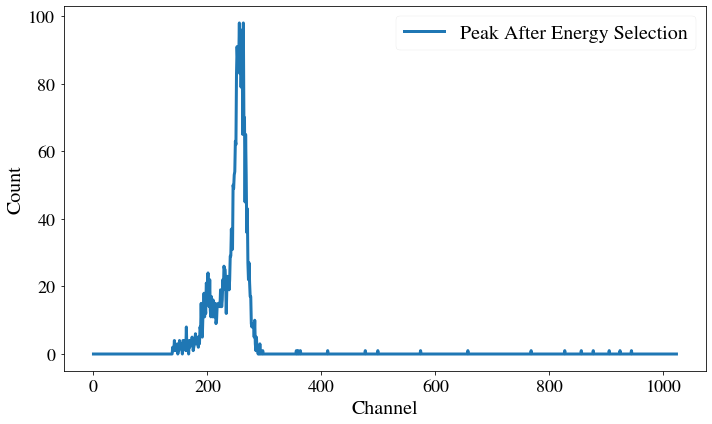

In [59]:
plt.figure(figsize=(10,6))
plt.plot(es,label="Peak After Energy Selection")
plt.legend()
plt.xlabel("Channel")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("../plots/EnergySelection.pdf")


In [60]:
comparison = pd.read_csv("../data/Comparison.csv")
comparison.to_latex("../Report/EnergySelection.tex",index=False)

In [3]:
lifetime = np.loadtxt("../data/5ks.txt")

<ipython-input-9-b7c5bd09b303>:2: RuntimeWarning: divide by zero encountered in log
  plt.scatter(channel,np.log(lifetime))


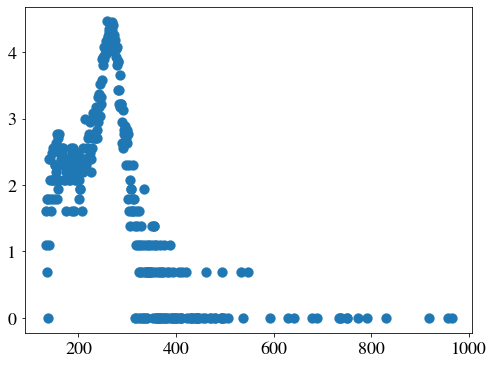

In [9]:
channel = np.arange(1,1025)
plt.scatter(channel,np.log(lifetime))

In [4]:
p0 = 806492
p1 = 0.701046 
p2 = 1.752e20
p3 = 2.5822

In [5]:
f1 = lambda x: p0*np.exp(-p1*x)
f2 = lambda x: p2*np.exp(-p3*x)

<ipython-input-6-31ea5bd1e456>:3: RuntimeWarning: divide by zero encountered in log
  plt.scatter(dt,np.log(lifetime))


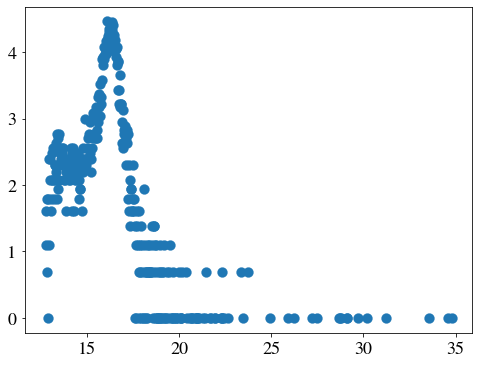

In [6]:
channel = np.arange(1,1025)
dt = channel * 0.0265 + 9.2350
plt.scatter(dt,np.log(lifetime))

In [7]:
channel_mask = np.logical_and(channel >= 270, channel <= 500)

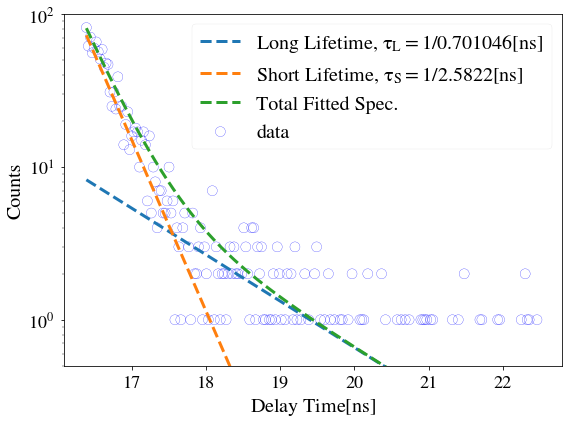

In [9]:
plt.scatter(dt[channel_mask],lifetime[channel_mask],facecolors = "none",edgecolors="b",label="data")
plt.plot(dt[channel_mask],f1(dt[channel_mask]),"--",label="Long Lifetime, $\\tau_L = 1/0.701046[ns]$")
plt.plot(dt[channel_mask],f2(dt[channel_mask]),'--',label="Short Lifetime, $\\tau_S = 1/2.5822[ns]$")
plt.plot(dt[channel_mask],f1(dt[channel_mask])+f2(dt[channel_mask]),'--',label="Total Fitted Spec.")
plt.yscale("log")
plt.ylim((0.5,100))
plt.ylabel("Counts")
plt.xlabel("Delay Time$[ns]$")
plt.legend()
plt.tight_layout()
plt.savefig("../plots/5ks.pdf")

In [85]:
dt_sel = dt[channel_mask]
lifetime_sel = lifetime[channel_mask]

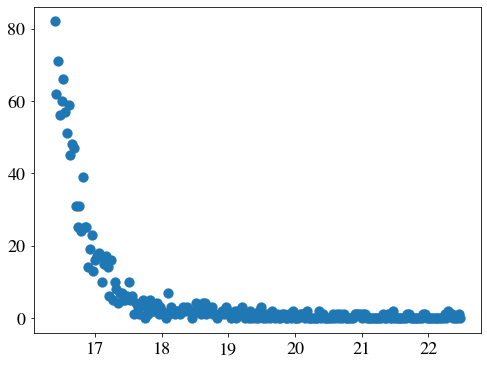

In [86]:
plt.scatter(dt_sel,lifetime_sel)

In [87]:
longtime = dt_sel[dt_sel > 17.2]
longtimeSepc = lifetime_sel[dt_sel > 17.2]

<ipython-input-90-03e5af8b7a01>:1: RuntimeWarning: divide by zero encountered in log
  plt.scatter(longtime,np.log(longtimeSepc))


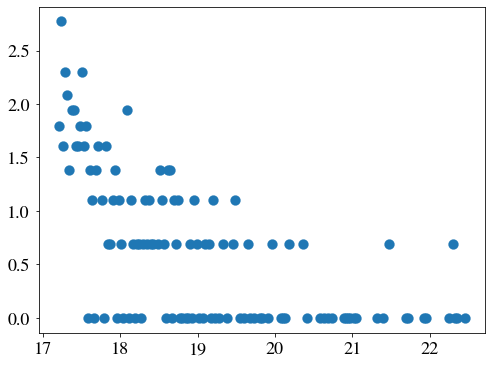

In [90]:
plt.scatter(longtime,np.log(longtimeSepc))


In [91]:
X_longtime = sm.add_constant(longtime[longtimeSepc!=0])

In [93]:
Y_longtime = np.exp(longtimeSepc[longtimeSepc!=0])

In [94]:
model2 = sm.OLS(Y_longtime,X_longtime)
res2 = model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.797
Date:                Mon, 10 May 2021   Prob (F-statistic):              0.183
Time:                        18:48:12   Log-Likelihood:                -1699.8
No. Observations:                 113   AIC:                             3404.
Df Residuals:                     111   BIC:                             3409.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.506e+06   1.07e+06      1.411      0.161   -6.09e+05    3.62e+06
x1         -7.466e+04   5.57e+04     -1.341      0.183   -1.85e+05    3.57e+04
==============================================================================
Omnibus:                      241.102   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53425.400
Skew:                          10.238   Prob(JB):                         0.00
Kurtosis:                     107.536   Cond. No.                         262.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
nc_td = pd.read_csv("../data/nctd.csv")

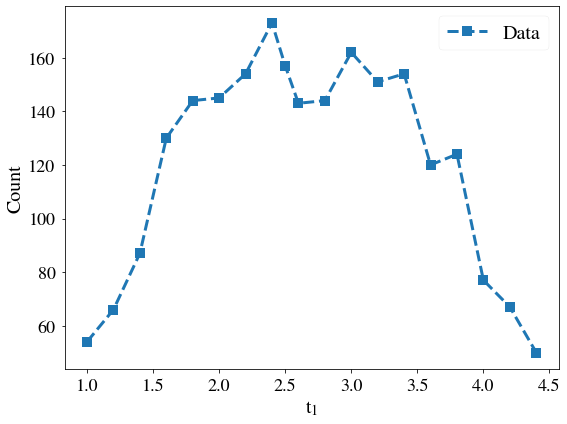

In [20]:
plt.plot(nc_td['t'],nc_td['count'],"--s",label="Data")
plt.legend()
plt.xlabel("$t_1$")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("../plots/Nc_Td.pdf")